<a href="https://colab.research.google.com/github/ricardo-emanuel24/Ciencia-de-Dados/blob/main/atividade_7_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definição do Problema

O objetivo é classificar imagens em escala de cinza de dígitos manuscritos (0-9) do conjunto de dados MNIST. Este é um conjunto de 70.000 imagens em escala de cinza de dígitos manuscritos (0-9). Cada imagem é uma matriz de 28x28 pixels, onde cada pixel representa a intensidade dos valores em escala de cinza (0 a 255).

O conjunto de dados MNIST consiste em 60.000 amostras de treinamento e 10.000 amostras de teste. Ele é amplamente utilizado como referência em aprendizado de máquina para tarefas como classificação de imagens.

O objetivo é treinar uma rede neural para prever com precisão o dígito correto para cada imagem com base nos padrões aprendidos durante o treinamento. Este é um problema de aprendizado supervisionado, onde a entrada é a imagem e a saída é o rótulo do dígito.

Aqui está um exemplo de como o computador interpreta cada imagem do conjunto de dados:

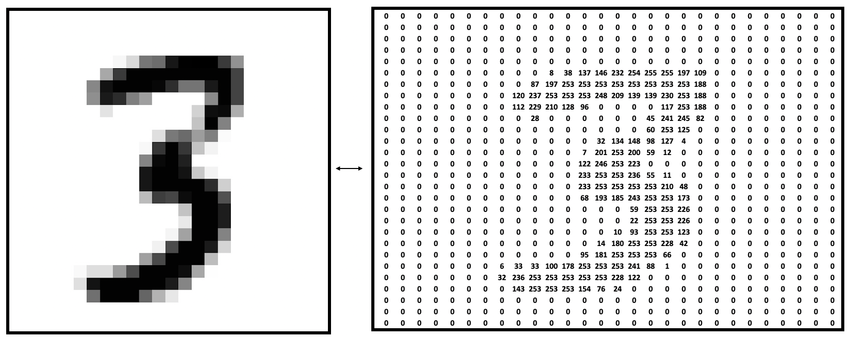

# 2. Configuração

## 2.1. Bibliotecas

In [24]:
# Bibliotecas
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Garantir reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

O TensorFlow é um framework popular de aprendizado profundo usado para construir e treinar redes neurais e será utilizado aqui devido à sua flexibilidade, escalabilidade e facilidade de integração. Para iniciantes, o TensorFlow oferece APIs de alto nível, como o Keras, que simplificam o processo de criação e treinamento de modelos. Essas características fazem do TensorFlow uma excelente escolha para aprendizado e experimentação.

# 2.2. Análise Exploratória

Antes de carregar o conjunto de dados, vamos entender sua estrutura visualmente. Isso nos ajudará a compreender a natureza dos dados com os quais estamos trabalhando.

Podemos visualizar algumas amostras do conjunto MNIST para observar como são os dígitos manuscritos.

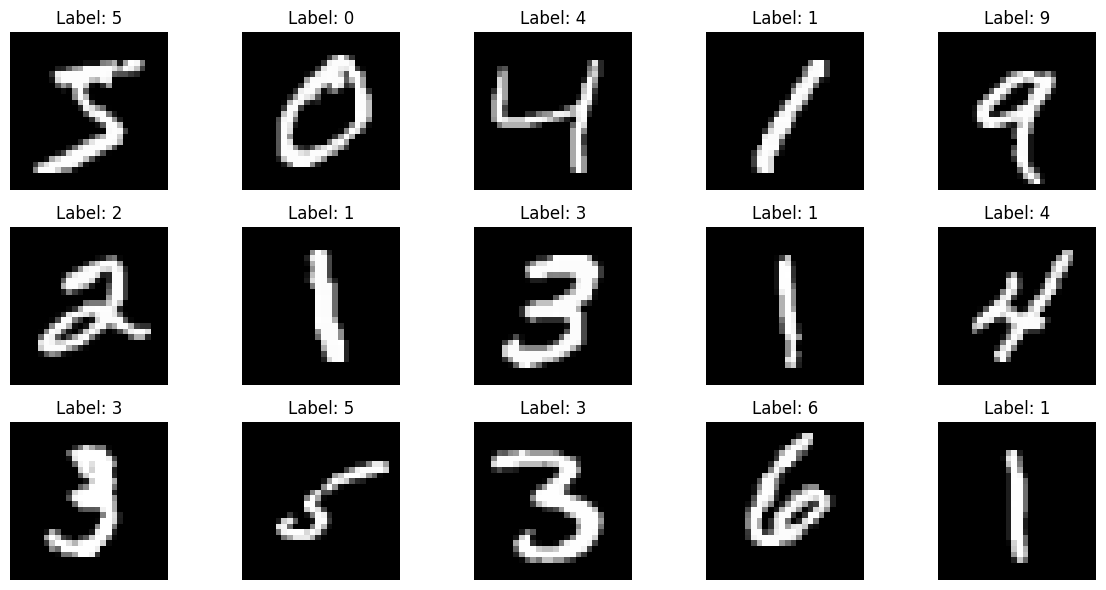

In [33]:
# Carregar o dataset MNIST
(temp_X_train, temp_y_train), _ = mnist.load_data()

# PLotar imagens de amostras com legendas
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(temp_X_train[i], cmap='gray')
    plt.title(f"Label: {temp_y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Isso nos ajudará a verificar se o conjunto de dados está balanceado (ou seja, se há uma representação igual de todos os dígitos).


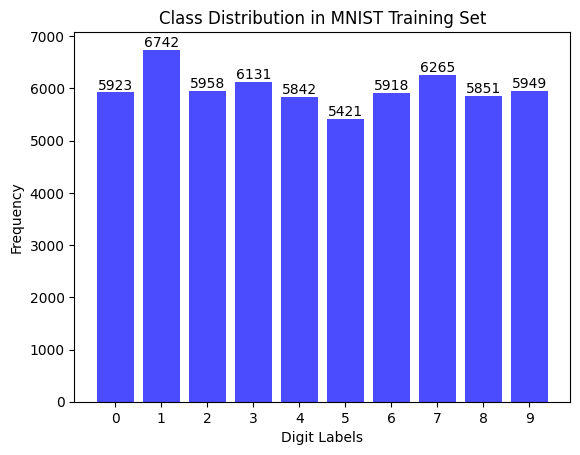

In [10]:
# Analyze class distribution
unique, counts = np.unique(temp_y_train, return_counts=True)
plt.bar(unique, counts, color='blue', alpha=0.7)
for i, count in enumerate(counts):
    plt.text(unique[i], count, str(count), ha='center', va='bottom')
plt.title('Class Distribution in MNIST Training Set')
plt.xticks(unique, [str(digit) for digit in unique])
plt.xlabel('Digit Labels')
plt.ylabel('Frequency')
plt.show()

# 3. Carregar e pré-processar os dados MNIST

A normalização garante que os dados de entrada tenham um intervalo uniforme, o que ajuda o modelo a convergir mais rapidamente durante o treinamento. As redes neurais têm um desempenho melhor quando os dados são escalados, pois isso evita que valores de entrada maiores dominem o processo de aprendizado.

In [21]:
# Carregar o dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar os valores dos pixels para [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Expandir dimensões para (28,28,1) necessário para CNN
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

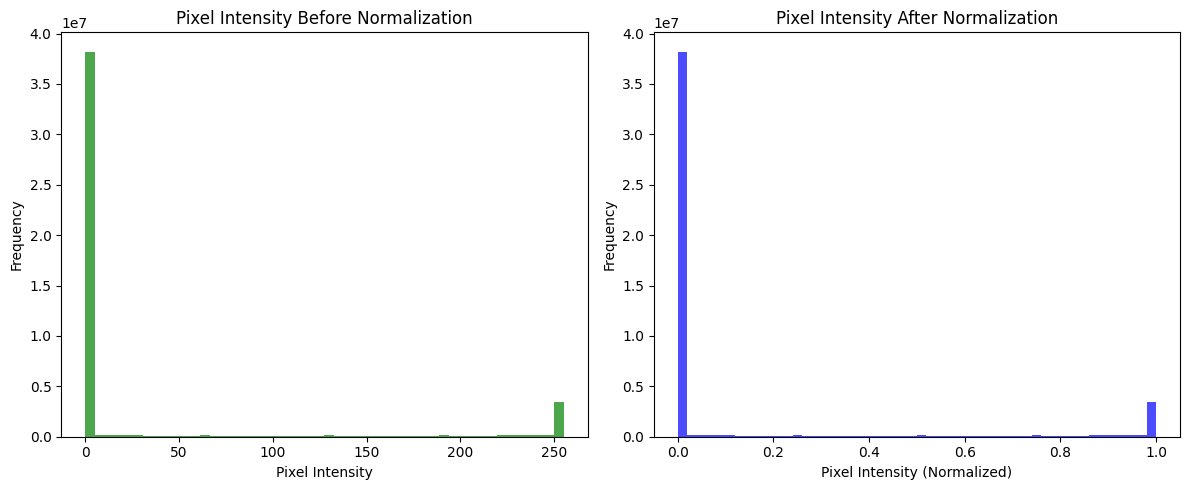

In [22]:
# Visualize the effects of normalization
# Compare the pixel intensity distribution before and after normalization
plt.figure(figsize=(12, 5))

# Before normalization
plt.subplot(1, 2, 1)
plt.hist(temp_X_train.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Pixel Intensity Before Normalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# After normalization
plt.subplot(1, 2, 2)
plt.hist(X_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity After Normalization')
plt.xlabel('Pixel Intensity (Normalized)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4. Modelagem de Redes Neurais Convolucionais (CNN)

Define uma rede neural convolucional com camadas para extração de características, redução de dimensionalidade e classificação dos dígitos manuscritos.

In [25]:
# Construção do Modelo CNN

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilação e Treinamento do Modelo
Configura o modelo com uma função de perda, um otimizador e uma métrica de desempenho, em seguida, treina a rede com os dados de treinamento e validação.

In [29]:
# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9944 - loss: 0.0189 - val_accuracy: 0.9919 - val_loss: 0.0316
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9927 - val_loss: 0.0312
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9919 - val_loss: 0.0309
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9956 - loss: 0.0129 - val_accuracy: 0.9927 - val_loss: 0.0304
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9908 - val_loss: 0.0355
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9953 - loss: 0.0138 - val_accuracy: 0.9930 - val_loss: 0.0350
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9916 - val_loss: 0.0366
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9959 -

## Avaliação do Modelo
Testa o desempenho do modelo no conjunto de teste e exibe a acurácia final da rede.

In [27]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nAcurácia no conjunto de teste: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9899 - loss: 0.0359

Acurácia no conjunto de teste: 0.9921


## Visualização da Curva de Aprendizado
Gera gráficos para analisar o progresso do treinamento, comparando acurácia e perda ao longo das épocas

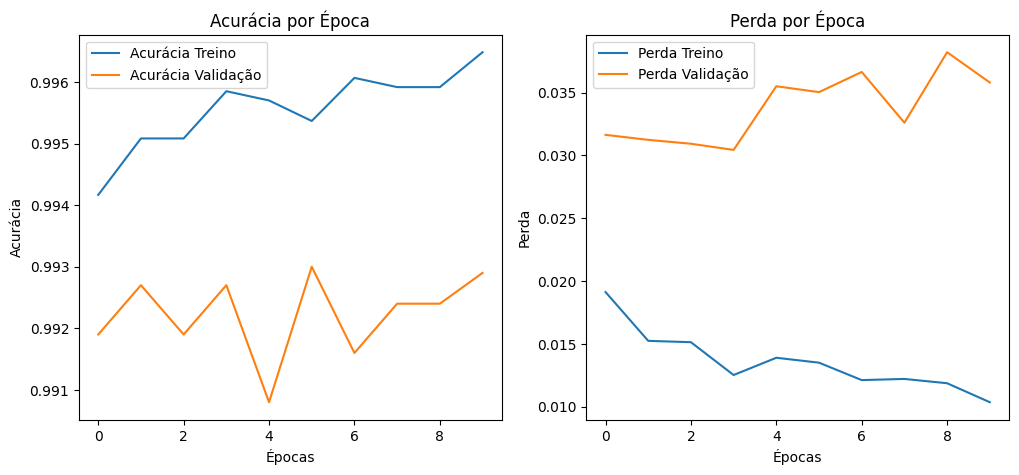

In [30]:
# Plotar a curva de aprendizado
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda por Época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

## Predições e Demonstração
Realiza previsões em imagens do conjunto de teste e exibe algumas amostras comparando os valores previstos e reais.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


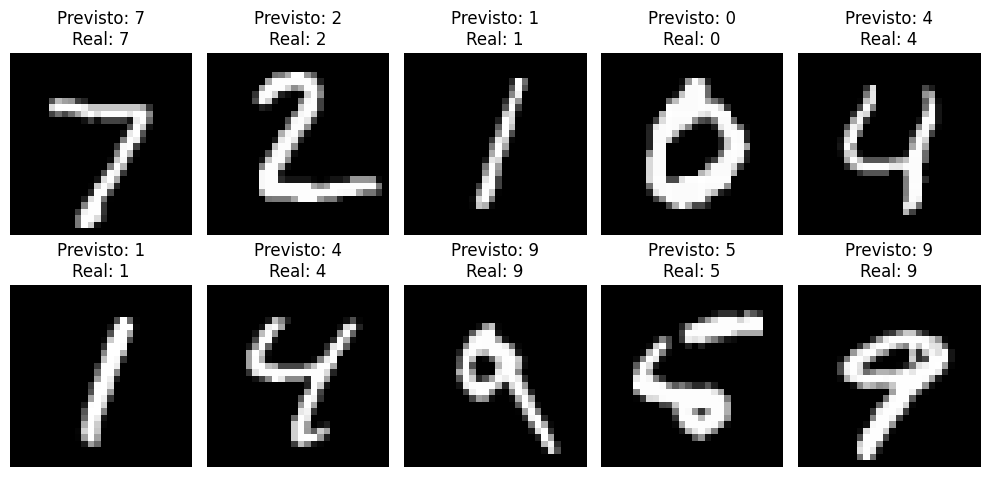

In [41]:
# Fazer previsões
predictions = model.predict(X_test)

# Exibir algumas previsões
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Previsto: {np.argmax(predictions[i])}\nReal: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 5. Conclusão

Podemos concluir que a rede neural convolucional (CNN) foi capaz de aprender a classificar com sucesso os dígitos manuscritos do conjunto MNIST